# load and import

In [1]:
!pip install holidays

In [2]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import holidays
import datetime as dt
from holidays import country_holidays
import statsmodels.tsa.api as tsa
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)
# modeling
import pmdarima as pm 
from pmdarima.arima.utils import ndiffs, nsdiffs
from pmdarima.model_selection import train_test_split
import pmdarima as pm 
plt.rcParams['figure.figsize']=(12,3)


In [4]:
path = 'Crimes_-_2001_to_Present_20240604 (1).csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8074782 entries, 0 to 8074781
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


# prepering data frame

In [5]:
# convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8074782 entries, 0 to 8074781
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [6]:
# check for null in date column
df['Date'].isna().sum()

0

In [7]:
# set the date column as index
df = df.set_index('Date')
df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2007-08-25 09:22:18,5741943,HN549294,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2021-05-24 15:06:00,25953,JE240540,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2021-06-26 09:24:00,26038,JE279849,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
2023-11-09 07:30:00,13279676,JG507211,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
2023-11-12 07:59:00,13274752,JG501049,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [8]:
# sort_index
df = df.sort_index()
df.index


DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               ...
               '2024-05-27 00:00:00', '2024-05-27 00:00:00',
               '2024-05-27 00:00:00', '2024-05-27 00:00:00',
               '2024-05-27 00:00:00', '2024-05-27 00:00:00',
               '2024-05-27 00:00:00', '2024-05-27 00:00:00',
               '2024-05-27 00:00:00', '2024-05-27 00:00:00'],
              dtype='datetime64[ns]', name='Date', length=8074782, freq=None)

In [9]:
# add yaer column
df['Year'] = df.index.year
# add month column
df['Month'] = df.index.month
# add hour of day column
df['HourOfDay'] = df.index.hour
df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,HourOfDay
Date,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,9755248,HX403559,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,29.0,17,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,1,0
2001-01-01,1520951,G268785,080XX S CHAMPLAIN AV,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,631,6.0,NaN,NaN,06,1182001.0,1851822.0,2001,08/17/2015 03:03:40 PM,41.748623,-87.608654,"(41.748623027, -87.608654109)",1,0
2001-01-01,9747360,HX397217,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,29.0,17,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,1,0
2001-01-01,12784654,JF345495,035XX W ARTHINGTON ST,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,1133,11.0,24.0,27.0,02,NaN,NaN,2001,08/13/2022 03:40:24 PM,NaN,NaN,NaN,1,0
2001-01-01,1309913,G000355,026XX S INDIANA AV,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2112,2.0,NaN,NaN,14,1178078.0,1886818.0,2001,08/17/2015 03:03:40 PM,41.844745,-87.621968,"(41.844745115, -87.621968071)",1,0


# Prepering crimes counts dataframe

(<Axes: xlabel='Date'>,)

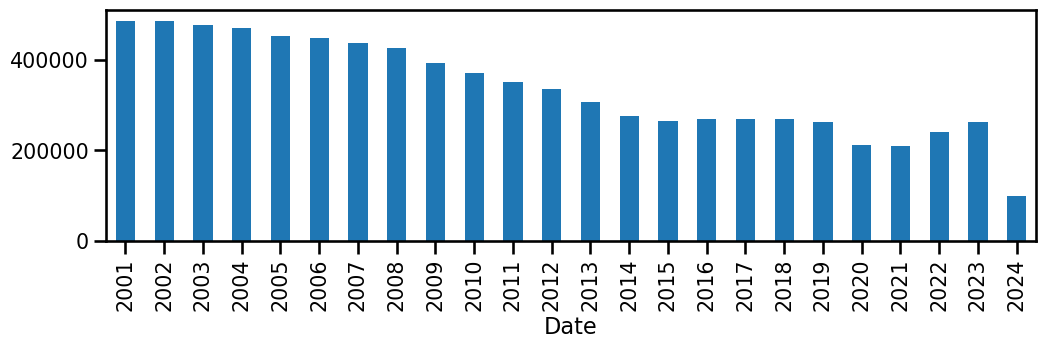

In [10]:
# visualize  crimes based on year
years = df.index.year
years.value_counts().sort_index().plot(kind='bar'),

<Axes: ylabel='Primary Type'>

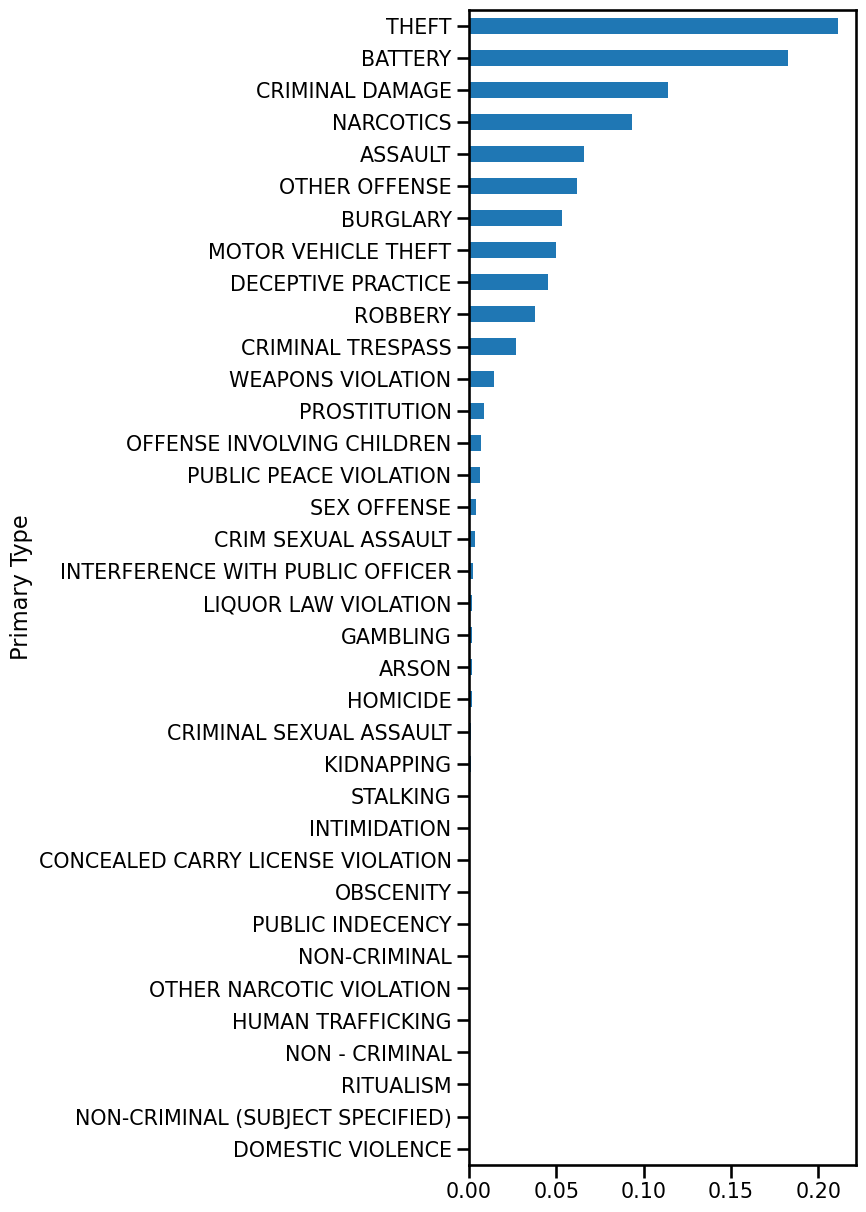

In [11]:
# inspecting the value counts for crimes
crime_counts = df['Primary Type'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(5,15))

In [12]:
# Inspect the value_counts for the different types of crimes
crime_counts = df['Primary Type'].value_counts().to_frame('Total # of Crimes')
crime_counts

,Total # of Crimes
Primary Type,
THEFT,1706101
BATTERY,1473020
CRIMINAL DAMAGE,919955
NARCOTICS,753786
ASSAULT,532878
OTHER OFFENSE,501726
BURGLARY,432607
MOTOR VEHICLE THEFT,404452
DECEPTIVE PRACTICE,364678


In [13]:
# get list of unique crime
crim_list = df['Primary Type'].unique()
crim_list

array(['SEX OFFENSE', 'THEFT', 'OFFENSE INVOLVING CHILDREN',
       'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL SEXUAL ASSAULT', 'OTHER OFFENSE', 'ASSAULT', 'BURGLARY',
       'BATTERY', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION',
       'CRIMINAL TRESPASS', 'ROBBERY', 'NARCOTICS',
       'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'HOMICIDE',
       'GAMBLING', 'KIDNAPPING', 'PROSTITUTION', 'INTIMIDATION', 'ARSON',
       'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'], dtype=object)

In [14]:
# 2. Create an empty dictionary

CRIMES = {}
# 3. Loop through the list of crimes
for crime in crim_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df.loc[ df['Primary Type']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts)
    # and keep ONLY the .size()
   temp_res = temp.resample("D").size()
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy()
CRIMES.keys()



dict_keys(['SEX OFFENSE', 'THEFT', 'OFFENSE INVOLVING CHILDREN', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT', 'OTHER OFFENSE', 'ASSAULT', 'BURGLARY', 'BATTERY', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'ROBBERY', 'NARCOTICS', 'LIQUOR LAW VIOLATION', 'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'HOMICIDE', 'GAMBLING', 'KIDNAPPING', 'PROSTITUTION', 'INTIMIDATION', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'])

In [15]:
# convert our crimes to dataframe
crimes_df = pd.DataFrame(CRIMES)
crimes_df.head()

,SEX OFFENSE,THEFT,OFFENSE INVOLVING CHILDREN,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,CRIM SEXUAL ASSAULT,CRIMINAL SEXUAL ASSAULT,OTHER OFFENSE,ASSAULT,BURGLARY,BATTERY,MOTOR VEHICLE THEFT,WEAPONS VIOLATION,CRIMINAL TRESPASS,ROBBERY,NARCOTICS,LIQUOR LAW VIOLATION,PUBLIC PEACE VIOLATION,INTERFERENCE WITH PUBLIC OFFICER,STALKING,HOMICIDE,GAMBLING,KIDNAPPING,PROSTITUTION,INTIMIDATION,ARSON,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,65.0,412,101.0,233,94.0,38.0,4.0,167.0,70,66,296,60,32.0,29.0,41.0,97.0,3.0,5.0,1.0,1.0,2.0,2.0,2.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,4.0,221,4.0,118,78.0,2.0,0.0,101.0,66,68,143,65,9.0,35.0,35.0,175.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,5.0,226,3.0,136,49.0,7.0,0.0,96.0,79,57,165,72,7.0,35.0,51.0,133.0,2.0,7.0,0.0,1.0,0.0,0.0,3.0,16.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,1.0,243,5.0,133,42.0,2.0,0.0,96.0,57,55,173,87,9.0,29.0,55.0,142.0,4.0,3.0,3.0,0.0,2.0,2.0,2.0,19.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,2.0,265,9.0,142,53.0,6.0,0.0,90.0,68,55,178,86,6.0,29.0,55.0,185.0,8.0,5.0,2.0,0.0,1.0,0.0,3.0,16.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# add yaer column
crimes_df['Year'] = crimes_df.index.year
# add month column
crimes_df['Month'] = crimes_df.index.month
# add hour of day column
crimes_df['HourOfDay'] = crimes_df.index.hour
crimes_df.head()

,SEX OFFENSE,THEFT,OFFENSE INVOLVING CHILDREN,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,CRIM SEXUAL ASSAULT,CRIMINAL SEXUAL ASSAULT,OTHER OFFENSE,ASSAULT,BURGLARY,BATTERY,MOTOR VEHICLE THEFT,WEAPONS VIOLATION,CRIMINAL TRESPASS,ROBBERY,NARCOTICS,LIQUOR LAW VIOLATION,PUBLIC PEACE VIOLATION,INTERFERENCE WITH PUBLIC OFFICER,STALKING,HOMICIDE,GAMBLING,KIDNAPPING,PROSTITUTION,INTIMIDATION,ARSON,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL,Year,Month,HourOfDay
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,65.0,412,101.0,233,94.0,38.0,4.0,167.0,70,66,296,60,32.0,29.0,41.0,97.0,3.0,5.0,1.0,1.0,2.0,2.0,2.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,1,0
2001-01-02,4.0,221,4.0,118,78.0,2.0,0.0,101.0,66,68,143,65,9.0,35.0,35.0,175.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,1,0
2001-01-03,5.0,226,3.0,136,49.0,7.0,0.0,96.0,79,57,165,72,7.0,35.0,51.0,133.0,2.0,7.0,0.0,1.0,0.0,0.0,3.0,16.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,1,0
2001-01-04,1.0,243,5.0,133,42.0,2.0,0.0,96.0,57,55,173,87,9.0,29.0,55.0,142.0,4.0,3.0,3.0,0.0,2.0,2.0,2.0,19.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,1,0
2001-01-05,2.0,265,9.0,142,53.0,6.0,0.0,90.0,68,55,178,86,6.0,29.0,55.0,185.0,8.0,5.0,2.0,0.0,1.0,0.0,3.0,16.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,1,0


In [17]:
crimes_df.tail()

,SEX OFFENSE,THEFT,OFFENSE INVOLVING CHILDREN,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,CRIM SEXUAL ASSAULT,CRIMINAL SEXUAL ASSAULT,OTHER OFFENSE,ASSAULT,BURGLARY,BATTERY,MOTOR VEHICLE THEFT,WEAPONS VIOLATION,CRIMINAL TRESPASS,ROBBERY,NARCOTICS,LIQUOR LAW VIOLATION,PUBLIC PEACE VIOLATION,INTERFERENCE WITH PUBLIC OFFICER,STALKING,HOMICIDE,GAMBLING,KIDNAPPING,PROSTITUTION,INTIMIDATION,ARSON,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL,Year,Month,HourOfDay
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-05-23,4.0,173,7.0,59,39.0,NaN,0.0,37.0,82,32,147,63,16.0,14.0,21.0,12.0,0.0,1.0,4.0,3.0,1.0,NaN,1.0,NaN,0.0,4.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2024,5,0
2024-05-24,4.0,162,8.0,78,26.0,NaN,3.0,41.0,71,26,137,59,27.0,12.0,26.0,19.0,2.0,6.0,4.0,0.0,4.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2024,5,0
2024-05-25,1.0,188,4.0,81,22.0,NaN,3.0,40.0,68,29,146,74,27.0,15.0,16.0,13.0,1.0,7.0,4.0,3.0,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2024,5,0
2024-05-26,9.0,144,6.0,77,20.0,NaN,4.0,50.0,63,15,168,67,25.0,6.0,26.0,10.0,NaN,3.0,3.0,1.0,4.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2024,5,0
2024-05-27,NaN,6,NaN,1,NaN,NaN,NaN,NaN,3,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,5,0


# Stakeholder Questions to Answer

## Topic 1) Comparing Police Districts


In [44]:
df_2022 = df[df.index.year == 2022]
df_2022.head()


,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,HourOfDay
Date,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,12976975,JG145447,076XX S WOOD ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,611,6.0,17.0,71.0,26,NaN,NaN,2022,02/09/2023 03:41:47 PM,NaN,NaN,NaN,1,0
2022-01-01,12691932,JF233522,024XX E 106TH ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,True,434,4.0,7.0,51.0,07,1194409.0,1835217.0,2022,01/03/2023 03:40:27 PM,41.702762,-87.563732,"(41.70276162, -87.56373152)",1,0
2022-01-01,12589134,JF108209,009XX W WRIGHTWOOD AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,APARTMENT,False,False,1935,19.0,43.0,7.0,11,1169722.0,1917469.0,2022,01/03/2023 03:40:27 PM,41.929039,-87.651740,"(41.929039384, -87.651739711)",1,0
2022-01-01,12701677,JF245883,027XX W GRANVILLE AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2413,24.0,40.0,2.0,26,1157125.0,1941047.0,2022,01/03/2023 03:40:27 PM,41.994004,-87.697387,"(41.994004228, -87.697386718)",1,0
2022-01-01,12658444,JF193049,011XX N WESTERN AVE,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,SCHOOL - PUBLIC BUILDING,False,False,1212,12.0,1.0,24.0,17,1160197.0,1907701.0,2022,01/03/2023 03:40:27 PM,41.902438,-87.687012,"(41.902437713, -87.687011559)",1,0


In [45]:
# creat a datafream of the crimes and district in 2022
districts_crimes = df_2022.groupby('District').size()
districts_crimes = districts_crimes.to_frame('Total # of Crimes')

districts_crimes

,Total # of Crimes
District,
1.0,13080
2.0,11811
3.0,11939
4.0,13965
5.0,9806
6.0,14725
7.0,10330
8.0,14836
9.0,10385


In [46]:
# Identify the district with the highest number of crimes
most_crime_district = districts_crimes.idxmax()
most_crime_count = districts_crimes.max()
print(most_crime_district)
print(most_crime_count)


Total # of Crimes    8.0
dtype: float64
Total # of Crimes    14836
dtype: int64


In [47]:
# Identify the district with the lowest number of crimes
least_crime_district = districts_crimes.idxmin()
least_crime_count = districts_crimes.min()
print(least_crime_district)
print(least_crime_count)

Total # of Crimes    31.0
dtype: float64
Total # of Crimes    15
dtype: int64


- District number 8 has the highst number of crimes with 14836 crimes in 2022
- District number 31 has the lowest nukber of crimes in 2022 with 15 crimes

## Topic 2) Crimes Across the Years:

In [48]:
# groupby aad size the crimes_df
df_year = crimes_df.groupby('Year').resample('A').sum().sum(1)
df_year.head()

Year  Date      
2001  2001-12-31    1218659.0
2002  2002-12-31    1219932.0
2003  2003-12-31    1209466.0
2004  2004-12-31    1205278.0
2005  2005-12-31    1187986.0
dtype: float64

In [49]:
df_year = df_year.to_frame('Total # of Crimes')

df_year.reset_index('Date').head()


,Date,Total # of Crimes
Year,,
2001,2001-12-31,1218659.0
2002,2002-12-31,1219932.0
2003,2003-12-31,1209466.0
2004,2004-12-31,1205278.0
2005,2005-12-31,1187986.0


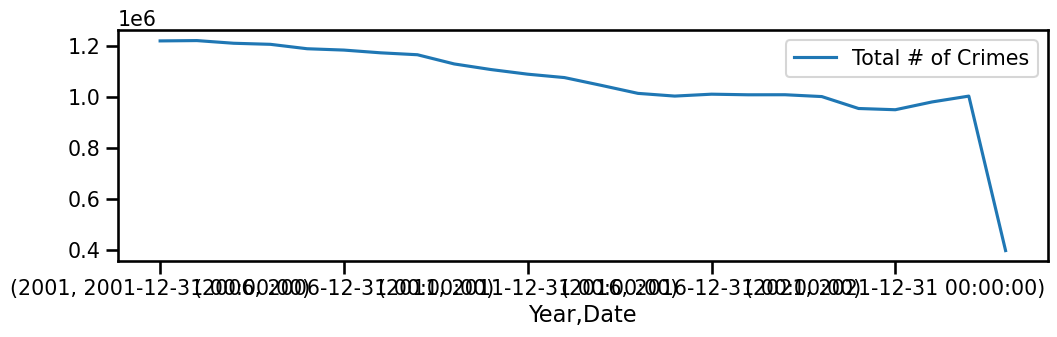

In [50]:
# plot 
ax = df_year.plot()


In [25]:
'''g = sns.catplot(data=df_year, x='Year', y='Total # of Crimes',
                kind='point',aspect=2, height=4,
                col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];'''

ValueError: Could not interpret input 'Year'

### A

In [26]:
'''## First, resample the data as annual
df_year  = df.groupby('Year')['Primary Type'].resample('A').sum().reset_index()
df_year['Total # of Crimes'] = df_year['Primary Type'].size()
df_year.head()'''


TypeError: 'int' object is not callable

In [ ]:
df_year.info()

In [ ]:
df_year.plot()

### B

In [54]:
# get crimes by year
crimes_by_year = df.groupby('Year')['Primary Type'].value_counts().sort_index()
crimes_by_year = crimes_by_year.to_frame('Total # of Crimes')
crimes_by_year

Total # of Crimes
Year Primary Type                                        
2001 ARSON                                           1011
     ASSAULT                                        31386
     BATTERY                                        93466
     BURGLARY                                       26014
     CONCEALED CARRY LICENSE VIOLATION                  1
...                                                   ...
2024 ROBBERY                                         3549
     SEX OFFENSE                                      495
     STALKING                                         164
     THEFT                                          21635
     WEAPONS VIOLATION                               3139

[751 rows x 1 columns]

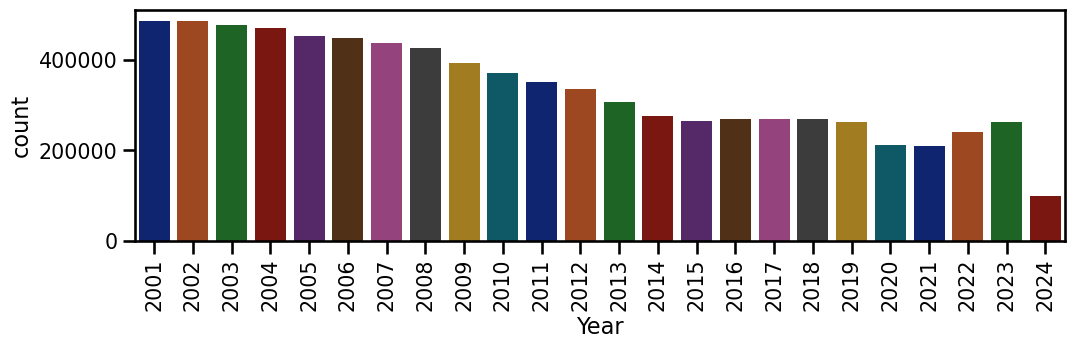

In [55]:
## visualizing again with years removed
ax = sns.countplot(data=df, x='Year', palette='dark');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [56]:
g = sns.catplot(data=crimes_by_year, x='Year', y='Total # of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

ValueError: Could not interpret input 'Year'

- Is the total number of crimes increasing or decreasing across the years?
 - the total number of crimes decrease across years

- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
  - CRIM SEXUAL ASSAULT it is increase till 2024 it decreased again  

# Topic 3) Comparing AM vs. PM Rush Hour:


In [57]:
df['HourOfDay'].value_counts()

HourOfDay
0     465546
12    463318
19    453268
20    451183
18    440893
21    437038
15    430092
22    429662
17    415388
16    408414
14    406136
13    382443
23    358504
11    357889
9     348649
10    342409
8     273406
1     256531
2     216736
7     185102
3     175766
4     134022
6     130221
5     112166
Name: count, dtype: int64

In [58]:
# get crimes by hour
crimes_by_hour = df.groupby('HourOfDay')['Primary Type'].value_counts().sort_index()
crimes_by_hour = crimes_by_hour.to_frame('Total # of Crimes')
crimes_by_hour

Total # of Crimes
HourOfDay Primary Type                                        
0         ARSON                                           1126
          ASSAULT                                        18382
          BATTERY                                        75350
          BURGLARY                                       20400
          CONCEALED CARRY LICENSE VIOLATION                 72
...                                                        ...
23        ROBBERY                                        17455
          SEX OFFENSE                                     1024
          STALKING                                         169
          THEFT                                          55045
          WEAPONS VIOLATION                               8781

[800 rows x 1 columns]

In [59]:
# am rush hour
am_rush1 = crimes_by_hour.loc[7] + crimes_by_hour.loc[8] + crimes_by_hour.loc[9] +crimes_by_hour.loc[10]
am_rush1

,Total # of Crimes
Primary Type,
ARSON,1191
ASSAULT,78796
BATTERY,166884
BURGLARY,97634
CONCEALED CARRY LICENSE VIOLATION,194
CRIM SEXUAL ASSAULT,2557
CRIMINAL DAMAGE,114572
CRIMINAL SEXUAL ASSAULT,757
CRIMINAL TRESPASS,31665


In [60]:
am_rush1.sum()

Total # of Crimes    1149566
dtype: int64

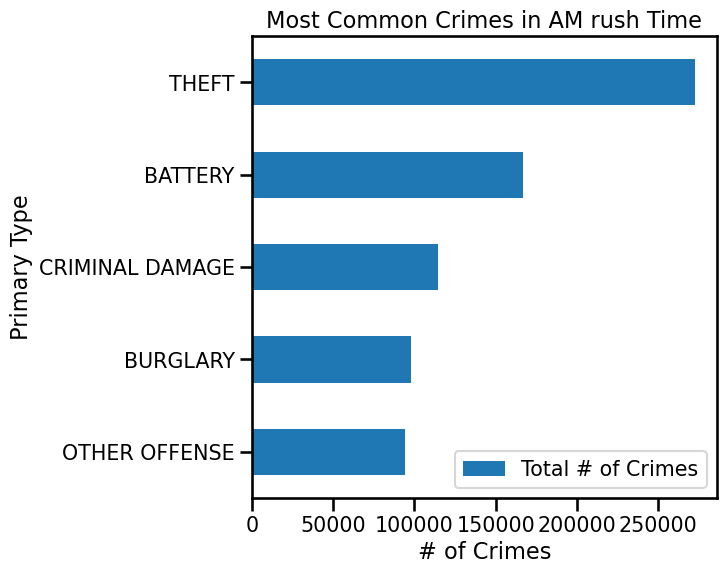

In [61]:
# plot the top five crimes ouccer at am rush hours 
ax = am_rush1.sort_values(by='Total # of Crimes').tail().plot(kind='barh',figsize=(6,6))
ax.set(title='Most Common Crimes in AM rush Time',xlabel='# of Crimes');

In [62]:
# pm rush hour
pm_rush1 = crimes_by_hour.loc[16] + crimes_by_hour.loc[17] + crimes_by_hour.loc[18] +crimes_by_hour.loc[19]
pm_rush1

,Total # of Crimes
Primary Type,
ARSON,1643.0
ASSAULT,125670.0
BATTERY,300719.0
BURGLARY,80275.0
CONCEALED CARRY LICENSE VIOLATION,247.0
CRIM SEXUAL ASSAULT,3864.0
CRIMINAL DAMAGE,191715.0
CRIMINAL SEXUAL ASSAULT,1151.0
CRIMINAL TRESPASS,50031.0


In [63]:
# the total number of crimes occure at pm rush hours
pm_rush1.sum()

Total # of Crimes    1717954.0
dtype: float64

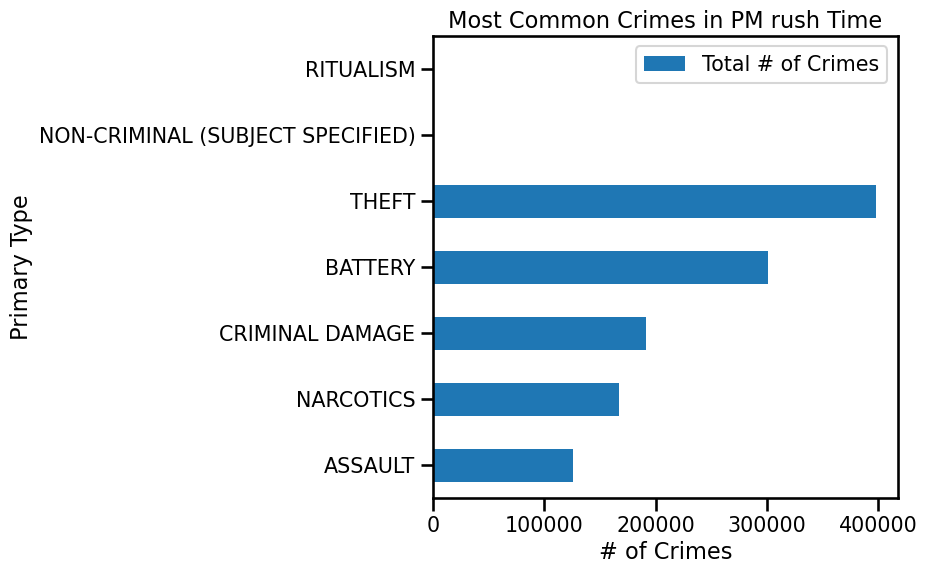

In [64]:
# plot the top five crimes ouccer at pm rush hours 
ax = pm_rush1.sort_values(by='Total # of Crimes').tail(7).plot(kind='barh',figsize=(6,6))
ax.set(title='Most Common Crimes in PM rush Time',xlabel='# of Crimes');

- **Are crimes more common during AM rush hour or PM rush hour?**
   - crimes are more common to occure during pm rush hour with ( 1717954)  crimes since       at am rush houre occure (1149566)crimes

- **What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?**
   - the top five crimes occure at am rush houre are(THEFT, BATTERY, CRIMINAL DAMAGE, BURGLARY, OTHER OFFENSE)
   - the top five crimes occure at pm rush hours are(THEFT, BATTERY, CRIMINAL DAMAGE, NARCOTICS, ASSAULT)

- **Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?**
   - it is more common at pm rush houre wich occured (83468) times compared to (58761) occurance numer at am rush time
          

### check later


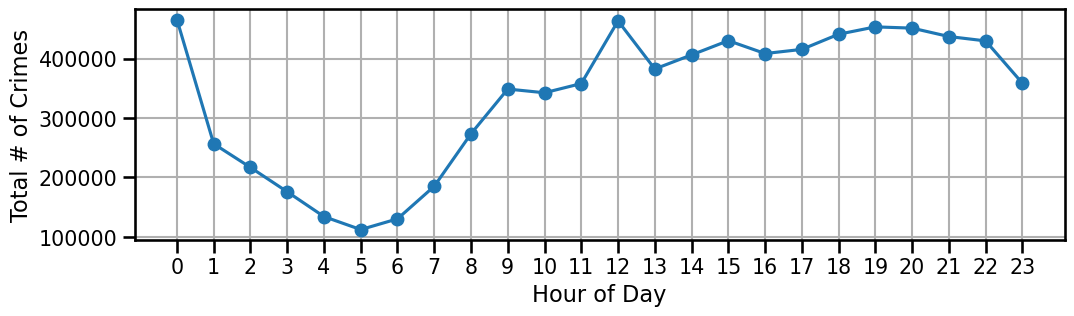

In [65]:
## save hour counts
hour_counts = df['HourOfDay'].value_counts().sort_index()

ax = hour_counts.plot(style='o-',grid=True,ylabel='Total # of Crimes', xlabel='Hour of Day',xticks=hour_counts.index);



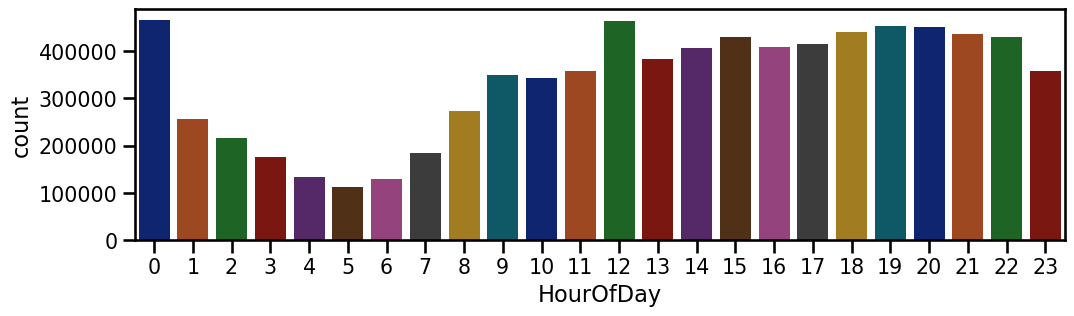

In [66]:
sns.countplot(data=df, x='HourOfDay',palette='dark');

In [67]:
df['HourOfDay'].value_counts().sort_index(ascending = False).head(24)


HourOfDay
23    358504
22    429662
21    437038
20    451183
19    453268
18    440893
17    415388
16    408414
15    430092
14    406136
13    382443
12    463318
11    357889
10    342409
9     348649
8     273406
7     185102
6     130221
5     112166
4     134022
3     175766
2     216736
1     256531
0     465546
Name: count, dtype: int64

In [68]:
am_rush = df[(df['HourOfDay'] >= 7) & (df['HourOfDay'] <= 10)]
am_rush

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,HourOfDay
Date,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 07:00:00,3057159,HJ772717,008XX S PARK TER,0842,THEFT,AGG: FINANCIAL ID THEFT,APARTMENT,False,False,132,1.0,2.0,32.0,06,1175883.0,1896549.0,2001,03/31/2006 10:03:38 PM,41.871497,-87.629731,"(41.87149726, -87.629730673)",1,7
2001-01-01 07:00:00,1396889,G970195,022XX E 87 ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,412,4.0,NaN,NaN,11,1192638.0,1847689.0,2001,08/17/2015 03:03:40 PM,41.737029,-87.569811,"(41.737029263, -87.569811335)",1,7
2001-01-01 07:00:00,1890605,G741680,069XX N WESTERN AV,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,SMALL RETAIL STORE,False,False,2411,24.0,NaN,NaN,26,1159112.0,1945536.0,2001,08/17/2015 03:03:40 PM,42.006281,-87.689954,"(42.006281477, -87.689953608)",1,7
2001-01-01 07:00:00,1352406,G054057,050XX W LAWRENCE AV,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1623,16.0,NaN,NaN,26,1141943.0,1931487.0,2001,08/17/2015 03:03:40 PM,41.968067,-87.753471,"(41.968066657, -87.753471148)",1,7
2001-01-01 07:00:00,1332711,G020451,012XX W FULLERTON AV,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",OTHER,False,False,1933,19.0,NaN,NaN,07,1167876.0,1916128.0,2001,08/17/2015 03:03:40 PM,41.925400,-87.658562,"(41.925399677, -87.658561925)",1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-26 10:45:00,13473324,JH279490,062XX S CAMPBELL AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,825,8.0,16.0,66.0,14,1160773.0,1863303.0,2024,06/03/2024 03:42:42 PM,41.780593,-87.686125,"(41.780592853, -87.686124717)",5,10
2024-05-26 10:50:00,13473494,JH279561,012XX W 119TH ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,True,524,5.0,21.0,53.0,06,1170139.0,1825866.0,2024,06/03/2024 03:42:42 PM,41.677662,-87.652872,"(41.677661758, -87.652872258)",5,10
2024-05-26 10:50:00,13473457,JH279476,085XX S COTTAGE GROVE AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,632,6.0,8.0,44.0,06,1183059.0,1848293.0,2024,06/03/2024 03:42:42 PM,41.738915,-87.604887,"(41.738914549, -87.604886727)",5,10


In [69]:
am_count = len(am_rush)
am_count

1149566

In [70]:
# 
pm_rush = df[(df['HourOfDay'] >= 16) & (df['HourOfDay'] <= 20)]
pm_rush

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,HourOfDay
Date,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 16:00:00,1311484,G001472,020XX N WESTERN AV,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1432,14.0,NaN,NaN,05,1160075.0,1913580.0,2001,08/17/2015 03:03:40 PM,41.918573,-87.687297,"(41.91857266, -87.687297035)",1,16
2001-01-01 16:00:00,1321113,G002946,050XX W 63 ST,0935,MOTOR VEHICLE THEFT,"THEFT/RECOVERY: TRUCK,BUS,MHOME",STREET,False,False,813,8.0,NaN,NaN,07,1143740.0,1862388.0,2001,08/17/2015 03:03:40 PM,41.778417,-87.748594,"(41.778416765, -87.748594469)",1,16
2001-01-01 16:00:00,2959704,HJ651547,025XX N PARKSIDE AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,False,False,2515,25.0,30.0,19.0,17,1138248.0,1916174.0,2001,03/31/2006 10:03:38 PM,41.926114,-87.767429,"(41.926114081, -87.767429352)",1,16
2001-01-01 16:00:00,1311512,G001419,099XX S WOOD ST,0460,BATTERY,SIMPLE,RESIDENCE,True,True,2213,22.0,NaN,NaN,08B,1166154.0,1838857.0,2001,08/17/2015 03:03:40 PM,41.713397,-87.667091,"(41.713396687, -87.667090886)",1,16
2001-01-01 16:00:00,1311758,G001540,034XX N OVERHILL AV,0460,BATTERY,SIMPLE,STREET,True,False,1631,16.0,NaN,NaN,08B,1124111.0,1921756.0,2001,08/17/2015 03:03:40 PM,41.941676,-87.819254,"(41.941676085, -87.819254165)",1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-26 20:43:00,13473846,JH280088,044XX S KEDZIE AVE,5111,OTHER OFFENSE,GUN OFFENDER - ANNUAL REGISTRATION,STREET,True,False,922,9.0,12.0,58.0,26,1155772.0,1874892.0,2024,06/03/2024 03:42:42 PM,41.812497,-87.704148,"(41.812496521, -87.704148458)",5,20
2024-05-26 20:44:00,13473847,JH280117,006XX N CLARK ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,1832,18.0,42.0,8.0,06,1175423.0,1904617.0,2024,06/03/2024 03:42:42 PM,41.893647,-87.631177,"(41.893646656, -87.631177143)",5,20
2024-05-26 20:48:00,13473904,JH280095,027XX W DIVISION ST,0860,THEFT,RETAIL THEFT,CONVENIENCE STORE,True,False,1423,14.0,26.0,24.0,06,1158012.0,1907868.0,2024,06/03/2024 03:42:42 PM,41.902941,-87.695033,"(41.902940868, -87.695032866)",5,20


In [71]:
pm_count = len(pm_rush)
pm_count

2169146

In [72]:
type(am_count)

int

In [73]:
# groupby am_rush with the primary type 
# get crimes by am hour
# Group by 'HourOfDay' and 'Primary Type' and get value counts
crimes_by_am_hour = am_rush.groupby(['HourOfDay', 'Primary Type']).size().reset_index(name='Total # of Crimes')

# Sort by 'HourOfDay'
crimes_by_am_hour = crimes_by_am_hour.sort_values(by='HourOfDay')
crimes_by_am_hour


,HourOfDay,Primary Type,Total # of Crimes
0,7,ARSON,326
32,7,WEAPONS VIOLATION,1106
31,7,THEFT,42299
30,7,STALKING,221
29,7,SEX OFFENSE,1044
...,...,...,...
110,10,HOMICIDE,305
111,10,HUMAN TRAFFICKING,5
112,10,INTERFERENCE WITH PUBLIC OFFICER,636
105,10,CRIMINAL DAMAGE,29239


In [74]:
crimes_by_am_hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   HourOfDay          132 non-null    int32 
 1   Primary Type       132 non-null    object
 2   Total # of Crimes  132 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 3.6+ KB


In [75]:
# top five crimes at am_rush hout


In [76]:
# looping through the value counts series
val_counts_by_hour = df.groupby('Primary Type')['HourOfDay'].value_counts()
val_counts_by_hour

Primary Type       HourOfDay
ARSON              0            1126
                   1            1119
                   2            1110
                   3            1029
                   4             916
                                ... 
WEAPONS VIOLATION  8            2215
                   4            1846
                   7            1106
                   6             990
                   5             958
Name: count, Length: 800, dtype: int64

In [77]:
type(crimes_by_hour)

pandas.core.frame.DataFrame

In [78]:
g = sns.catplot(data=crimes_by_hour, x='HourOfDay', y='Total # of Crimes',
                hue='Primary Type', col='Primary Type',col_wrap=2,
            aspect=2, height=4,
           kind='point',sharey=False,sharex=False);
## loop throught the axes dict
for col, ax in g.axes_dict.items():

    ## Extract the idx min and idxmax from the val counts
    min_, max_ = val_counts_by_hour.loc[col].agg(['idxmin','idxmax'])

    ## add vlines for both and SAVE THE LINE and a label to use in legend
    ln1 = ax.axvline(min_, color='darkgreen',ls='--')
    lab1 = f'Min(Hour={min_})'

    ln2 = ax.axvline(max_,color='darkred',ls='--')
    lab2 = f'Max(Hour={max_})'

    ## manually add legend using list of ln1 and ln2 and a list of labels
    ax.legend( [ln1,ln2], [lab1,lab2] )
    ## add x grid
    ax.grid(axis='x')

g.fig

ValueError: Could not interpret input 'HourOfDay'

In [79]:
val_counts_by_hour.index.get_level_values('Primary Type').value_counts().head()

Primary Type
ARSON           24
INTIMIDATION    24
THEFT           24
STALKING        24
SEX OFFENSE     24
Name: count, dtype: int64

In [80]:
val_counts_by_hour['Primary Type'].value_counts().head()
#pm_rush_hour = val_counts_by_hour.iloc[16:19]
#print(am_rush_hour)
#print(pm_rush_hour)


KeyError: 'Primary Type'

In [ ]:
am_rush_hour['Primary Type'].value_counts().head(5)

- Are crimes more common during AM rush hour or PM rush hour?
  - crimes more common in PM RUSH hours

-  ​What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
  -   

# Topic 4) Comparing Months:


In [81]:
# get crimes by month
crimes_by_month = df.groupby('Month')['Primary Type'].value_counts().sort_index()
crimes_by_month = crimes_by_month.to_frame('Total # of Crimes')
crimes_by_month

Total # of Crimes
Month Primary Type                                        
1     ARSON                                           1006
      ASSAULT                                        38241
      BATTERY                                       107763
      BURGLARY                                       33866
      CONCEALED CARRY LICENSE VIOLATION                 97
...                                                    ...
12    ROBBERY                                        26745
      SEX OFFENSE                                     2034
      STALKING                                         369
      THEFT                                         131703
      WEAPONS VIOLATION                               7955

[415 rows x 1 columns]

In [82]:
#
month_crime_sum = crimes_by_month.groupby('Month')['Total # of Crimes'].sum()
month_crime_sum.sort_values()

Month
2     567603
12    601128
11    630400
1     642043
4     668013
3     671160
9     690955
10    699412
6     704504
5     723571
8     734698
7     741295
Name: Total # of Crimes, dtype: int64

In [83]:
print( 'The Month with highst # of Crimes is', month_crime_sum.idxmax())
print('The Month with lowest # of Crimes is', month_crime_sum.idxmin())

The Month with highst # of Crimes is 7
The Month with lowest # of Crimes is 2


In [84]:
# what month have the most and least crimes
print(crimes_by_month.idxmax())
print(crimes_by_month.idxmin())

Total # of Crimes    (8, THEFT)
dtype: object
Total # of Crimes    (1, DOMESTIC VIOLENCE)
dtype: object


# Topic 5) Comparing Holidays:


In [85]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

NameError: name 'all_days' is not defined

In [86]:
## making a date range that covers full dataset
all_days = pd.date_range(crimes_df["Date"].min(), crimes_df["Date"].max())
all_days

KeyError: 'Date'

In [ ]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

In [87]:
## Saving both holiday types as columns
df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
df['MD Holiday'] = [md_holidays.get(day) for day in df['Date']]
df.head()

KeyError: 'Date'

In [88]:
holiday_crimes = df.groupby('US Holiday')['Primary Type'].value_counts()
holiday_crimes = holiday_crimes.to_frame('# of Crimes')
holiday_crimes

KeyError: 'US Holiday'

# Topic 6) What cycles (seasonality) can you find in this data?


In [18]:
crimes_ts = pd.DataFrame(CRIMES)
crimes_ts.head()

,SEX OFFENSE,THEFT,OFFENSE INVOLVING CHILDREN,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,CRIM SEXUAL ASSAULT,CRIMINAL SEXUAL ASSAULT,OTHER OFFENSE,ASSAULT,BURGLARY,BATTERY,MOTOR VEHICLE THEFT,WEAPONS VIOLATION,CRIMINAL TRESPASS,ROBBERY,NARCOTICS,LIQUOR LAW VIOLATION,PUBLIC PEACE VIOLATION,INTERFERENCE WITH PUBLIC OFFICER,STALKING,HOMICIDE,GAMBLING,KIDNAPPING,PROSTITUTION,INTIMIDATION,ARSON,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,65.0,412,101.0,233,94.0,38.0,4.0,167.0,70,66,296,60,32.0,29.0,41.0,97.0,3.0,5.0,1.0,1.0,2.0,2.0,2.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,4.0,221,4.0,118,78.0,2.0,0.0,101.0,66,68,143,65,9.0,35.0,35.0,175.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,5.0,226,3.0,136,49.0,7.0,0.0,96.0,79,57,165,72,7.0,35.0,51.0,133.0,2.0,7.0,0.0,1.0,0.0,0.0,3.0,16.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,1.0,243,5.0,133,42.0,2.0,0.0,96.0,57,55,173,87,9.0,29.0,55.0,142.0,4.0,3.0,3.0,0.0,2.0,2.0,2.0,19.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,2.0,265,9.0,142,53.0,6.0,0.0,90.0,68,55,178,86,6.0,29.0,55.0,185.0,8.0,5.0,2.0,0.0,1.0,0.0,3.0,16.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
crimes_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8548 entries, 2001-01-01 to 2024-05-27
Freq: D
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SEX OFFENSE                        8547 non-null   float64
 1   THEFT                              8548 non-null   int64  
 2   OFFENSE INVOLVING CHILDREN         8547 non-null   float64
 3   CRIMINAL DAMAGE                    8548 non-null   int64  
 4   DECEPTIVE PRACTICE                 8547 non-null   float64
 5   CRIM SEXUAL ASSAULT                6991 non-null   float64
 6   CRIMINAL SEXUAL ASSAULT            8547 non-null   float64
 7   OTHER OFFENSE                      8547 non-null   float64
 8   ASSAULT                            8548 non-null   int64  
 9   BURGLARY                           8548 non-null   int64  
 10  BATTERY                            8548 non-null   int64  
 11  MOTOR VEHICLE THEFT           

In [20]:
crimes_ts.index

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2024-05-18', '2024-05-19', '2024-05-20', '2024-05-21',
               '2024-05-22', '2024-05-23', '2024-05-24', '2024-05-25',
               '2024-05-26', '2024-05-27'],
              dtype='datetime64[ns]', name='Date', length=8548, freq='D')

In [21]:
# fill null values with 0
crimes_ts = crimes_ts.fillna(0)
crimes_ts.isna().sum()

SEX OFFENSE                          0
THEFT                                0
OFFENSE INVOLVING CHILDREN           0
CRIMINAL DAMAGE                      0
DECEPTIVE PRACTICE                   0
CRIM SEXUAL ASSAULT                  0
CRIMINAL SEXUAL ASSAULT              0
OTHER OFFENSE                        0
ASSAULT                              0
BURGLARY                             0
BATTERY                              0
MOTOR VEHICLE THEFT                  0
WEAPONS VIOLATION                    0
CRIMINAL TRESPASS                    0
ROBBERY                              0
NARCOTICS                            0
LIQUOR LAW VIOLATION                 0
PUBLIC PEACE VIOLATION               0
INTERFERENCE WITH PUBLIC OFFICER     0
STALKING                             0
HOMICIDE                             0
GAMBLING                             0
KIDNAPPING                           0
PROSTITUTION                         0
INTIMIDATION                         0
ARSON                    

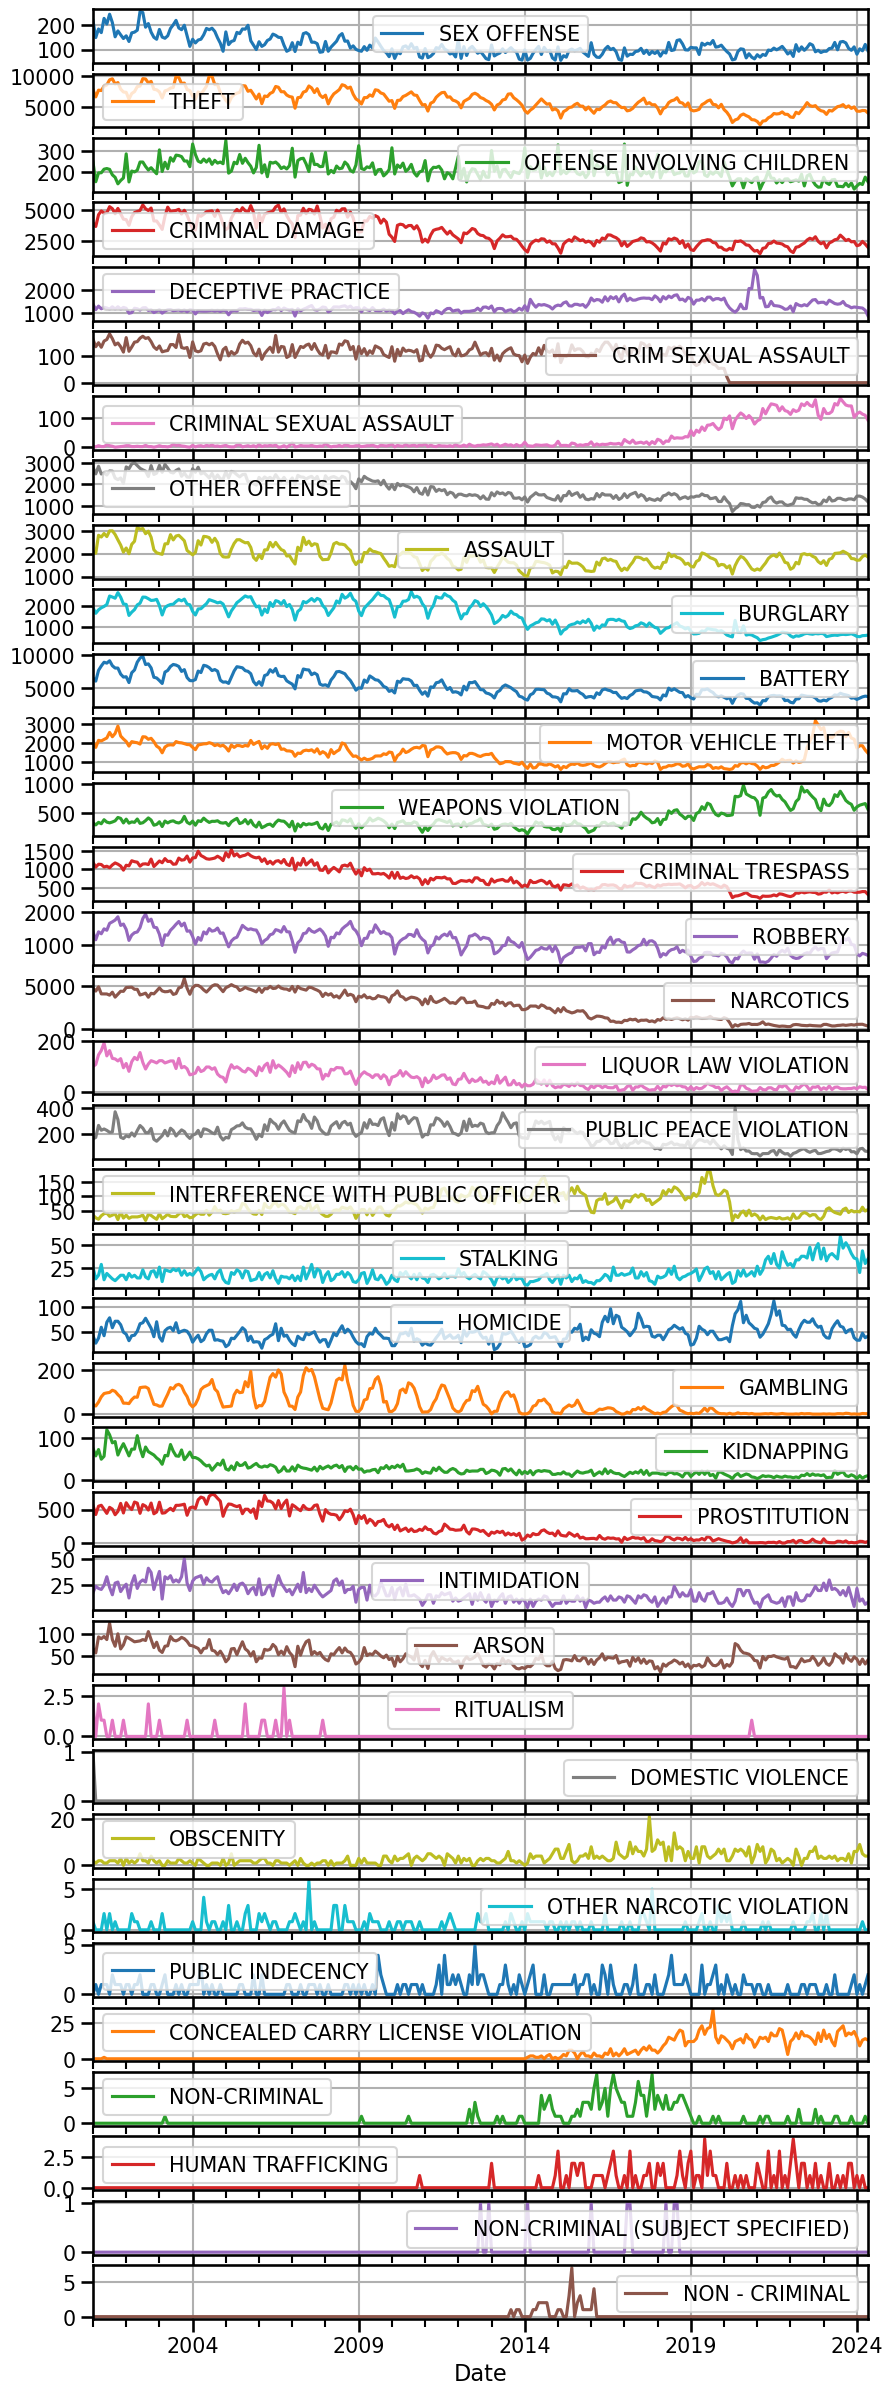

In [22]:
# resampling 
plot_df_W = crimes_ts.resample('M').sum()
ax = plot_df_W.plot(grid=True,subplots=True,figsize=(10,30));


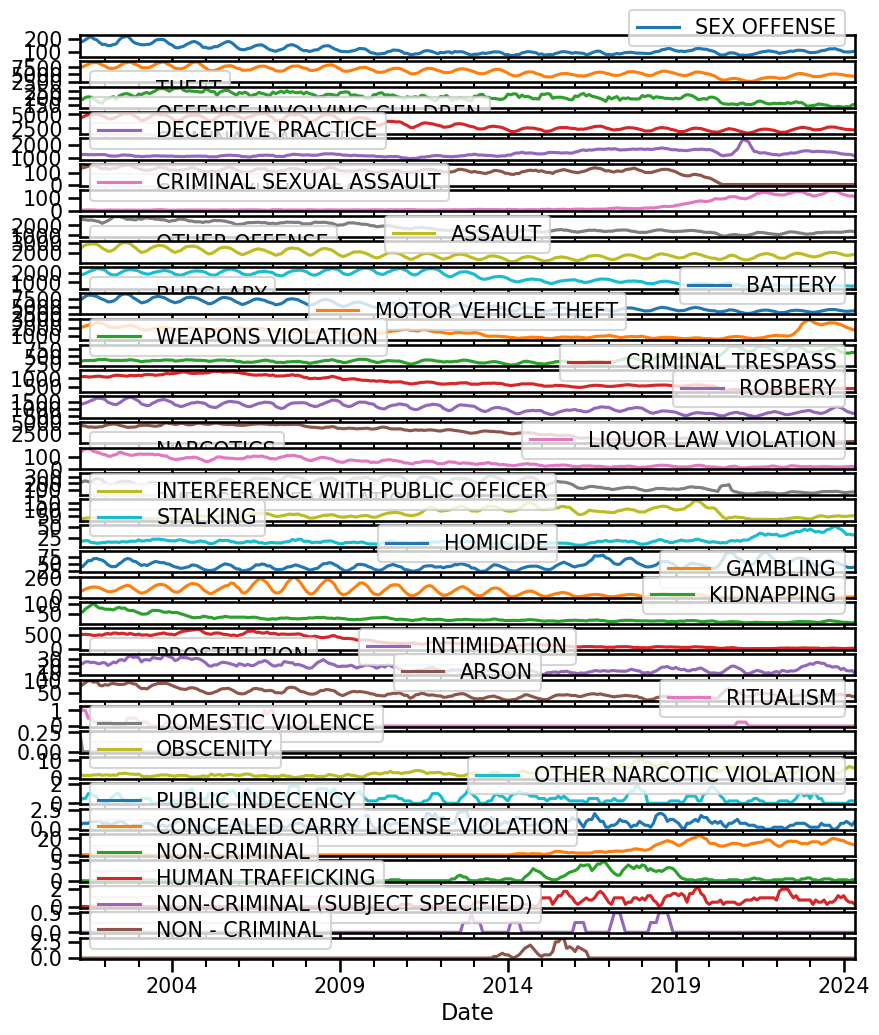

In [23]:
plot_df_W.rolling(4).mean().dropna().plot(subplots=True,figsize=(10,12));

<Axes: xlabel='Date'>

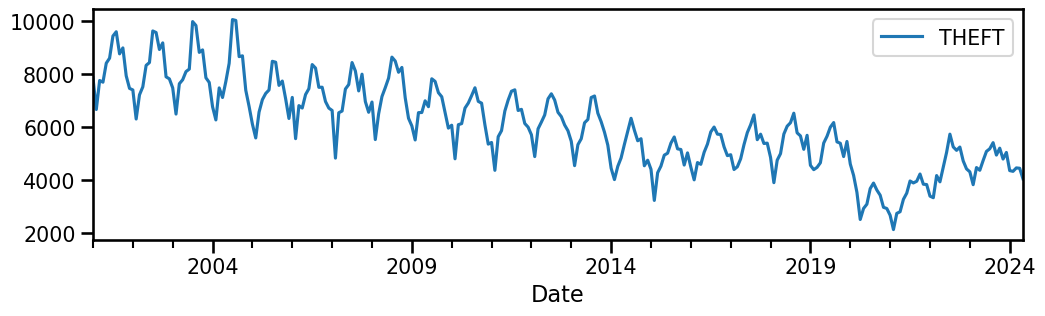

In [24]:
crimes = ['THEFT']
ts = plot_df_W[crimes]
ts.plot()

In [25]:

decomp = tsa.seasonal_decompose(ts)
decomp

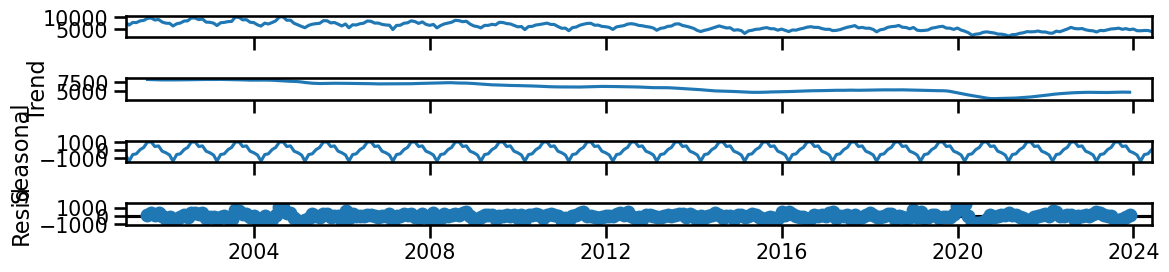

In [26]:
fig = decomp.plot()


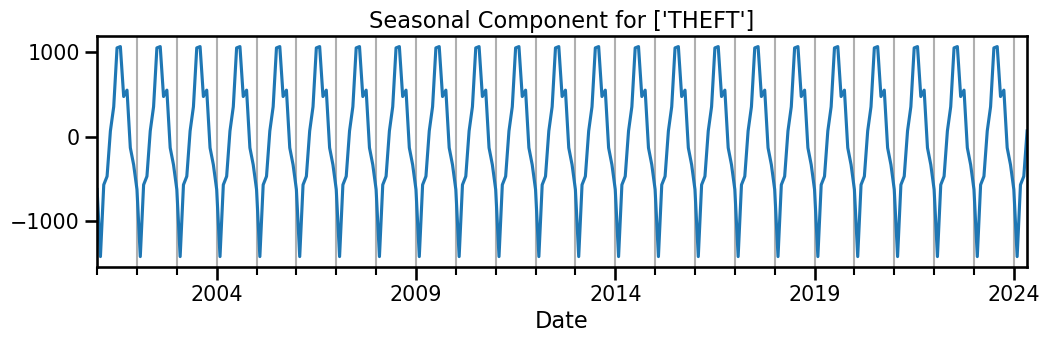

In [27]:
seasonal = decomp.seasonal
ax = seasonal.plot(title=f'Seasonal Component for {crimes}');
ax.grid(which='both', axis='x')

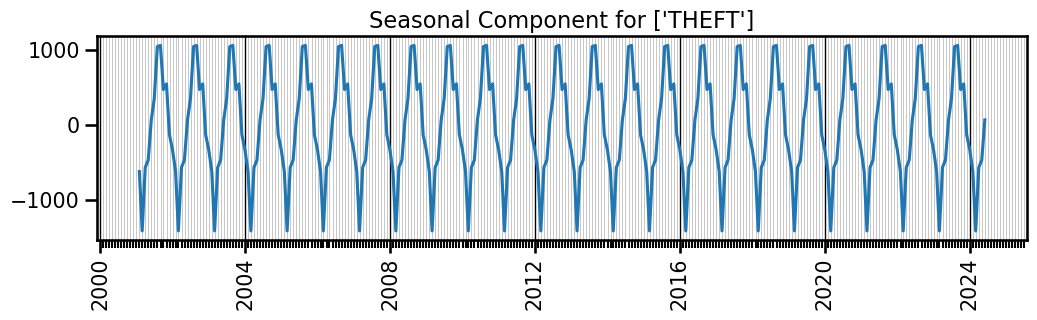

In [28]:
import matplotlib.dates as mdates
minor_loc = mdates.MonthLocator()
fig, ax = plt.subplots()
ax.plot(seasonal)
ax.set(title=f'Seasonal Component for {crimes}');
ax.xaxis.set_minor_locator(minor_loc)
ax.grid(which='major', axis='x',lw=1, color='k')
ax.grid(which='minor',axis='x',lw=0.5)
fig.autofmt_xdate(rotation=90, ha='center')

In [29]:
# max 
print(seasonal.max())
print(seasonal.idxmax())

1062.9137365502856
2001-08-31 00:00:00


In [30]:
# min 
print(seasonal.min())
print(seasonal.idxmin())

-1418.2737634497146
2001-02-28 00:00:00


In [31]:
magnitude = seasonal.max() - seasonal.min()
magnitude

2481.1875

-  for the THIFE crime there is a cycle took 12 monthe the min number of crimes happen at Feb and the highest number of crimes happen at Aug.

- **How long is a cycle?**
    - 12 months

- **What is the magnitude of the cycle? (Compare min and max).**
    - the magnitude of the cycle is 2481.1875      

# Project 3 - Part 2 (Core)

## import and function 

In [32]:
# functions

def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None,
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)

    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index,
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();

    return fig, ax



# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d,
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags,
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])



from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics



def get_sig_lags(ts, type='ACF', nlags=None, alpha=0.5):

    if type == 'ACF':
        # Running the function used by plot_acf
        corr_values, conf_int = tsa.stattools.acf(ts, alpha=alpha, nlags=nlags)

    elif type=='PACF':
        corr_values, conf_int = tsa.stattools.pacf(ts, alpha=alpha, nlags=nlags)

    else:
        raise Exception("type must be either 'ACF' or 'PACF'")

    # Determine lags
    lags =range(len(corr_values))

    # Create a centered version of the acf_df
    corr_df = pd.DataFrame({type:corr_values,
                            'Lags':lags,
                            'lower ci': conf_int[:,0]-corr_values, # subtract acf from lower ci to center
                            'upper ci': conf_int[:,1]-corr_values, # subtact acf to upper ci to center
                                 })
    corr_df = corr_df.set_index("Lags")

    # Getting filter for sig lags
    filter_sig_lags = (corr_df[type] < corr_df['lower ci']) | (corr_df[type] > corr_df['upper ci'])

    # Get lag #'s
    sig_lags= corr_df.index[filter_sig_lags]
    sig_lags = sig_lags[sig_lags!=0]

    return sig_lags


def plot_acf_pacf(ts, nlags=40, figsize=(10, 5),
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},
                  annotate_seas=False, m = None,
                 seas_color='black'):

    fig, axes = plt.subplots(nrows=2, figsize=figsize)


    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)

    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)

    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)




    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)

        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()

    return fig



## THEFT

In [88]:
col = 'THEFT' # if a dataframe
ts = crimes_ts[col]
ts

Date
2001-01-01    412
2001-01-02    221
2001-01-03    226
2001-01-04    243
2001-01-05    265
             ... 
2024-05-23    173
2024-05-24    162
2024-05-25    188
2024-05-26    144
2024-05-27      6
Freq: D, Name: THEFT, Length: 8548, dtype: int64

In [89]:
# resampling
ts = ts.resample('M').count()
ts

Date
2001-01-31    31
2001-02-28    28
2001-03-31    31
2001-04-30    30
2001-05-31    31
              ..
2024-01-31    31
2024-02-29    29
2024-03-31    31
2024-04-30    30
2024-05-31    27
Freq: M, Name: THEFT, Length: 281, dtype: int64

In [90]:
# heck nulls 
ts.isna().sum()

0

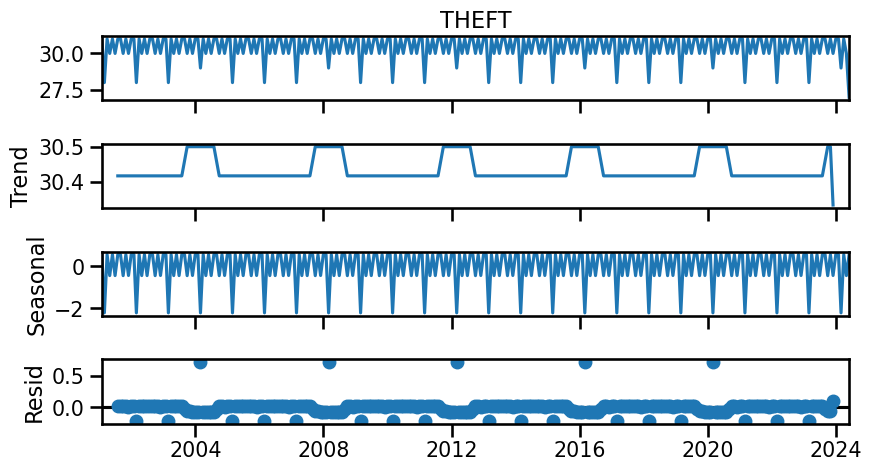

In [91]:
## Use Seasonal Decompose to check for seasonality
decomp = tsa.seasonal_decompose(ts)
fig = decomp.plot()
fig.set_size_inches(9, 5)
fig.tight_layout()


- i will use seasonal model

In [92]:
# Determine differencing
d = ndiffs(ts)
print(f'd is {d}')
D = nsdiffs(ts, m = 12)
print(f'D is {D}')

d is 0
D is 0


In [93]:
# Check for stationarity
get_adfuller_results(ts)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-3.12772,14,266,0.024569,0.05,True


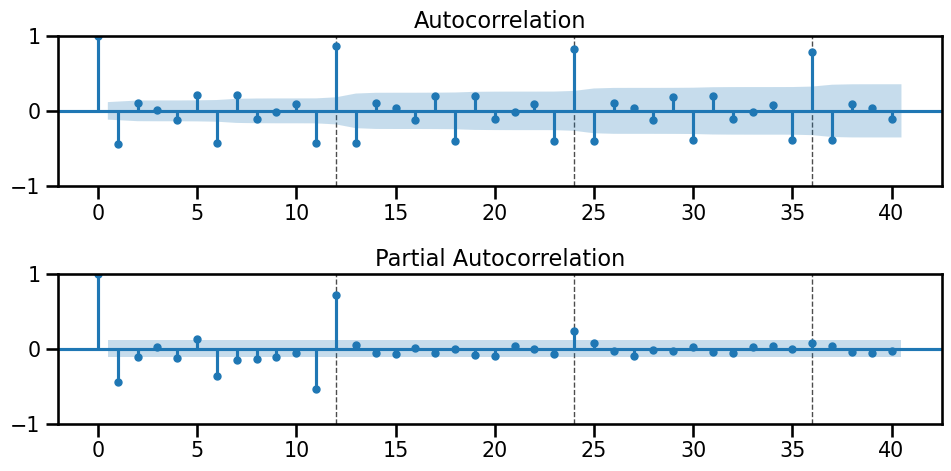

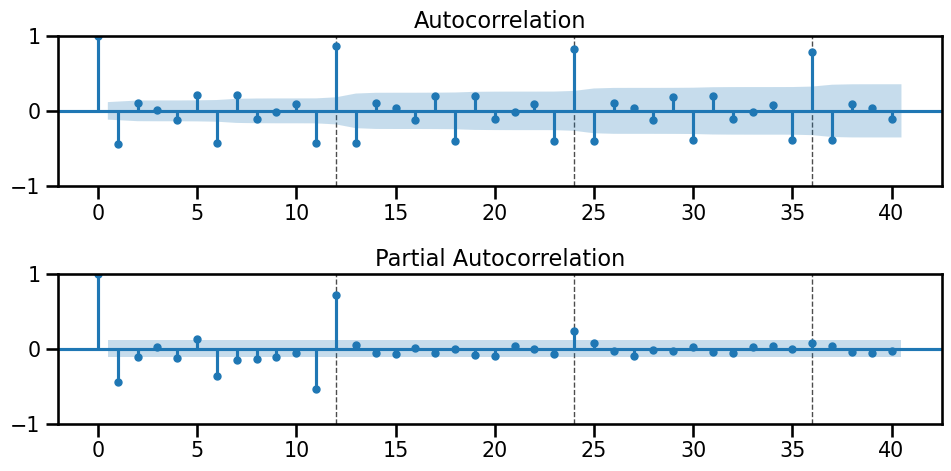

In [94]:
# ACF and PACF
plot_acf_pacf(ts, annotate_seas=True, m =12)

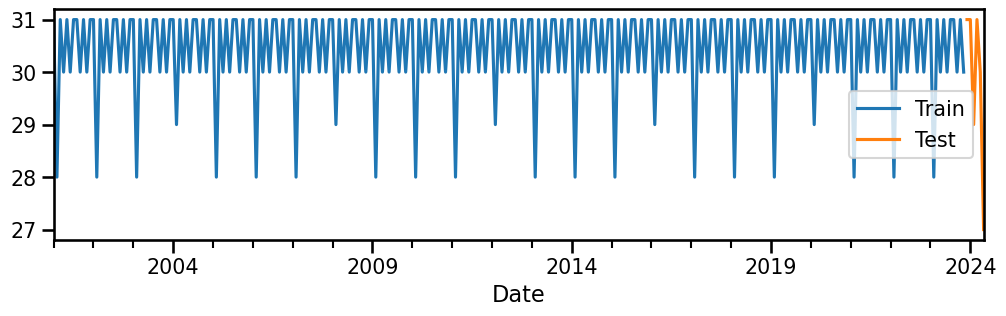

In [95]:
# split data to train and test 
train, test = train_test_split(ts, test_size=6)
# Visualize Train-test-split
ax = train.plot(label='Train')
test.plot(label='Test')
ax.legend();

In [96]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 0  # nonseasonal differencing
q = 1 # nonseasonal MA

# Orders for seasonal components (if seasonal model)
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()


In [97]:
# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            THEFT   No. Observations:                  275
Model:             ARIMA(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 142.362
Date:                          Thu, 04 Jul 2024   AIC                           -272.724
Time:                                  17:50:29   BIC                           -251.023
Sample:                              01-31-2001   HQIC                          -264.015
                                   - 11-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4389      0.247    123.479      0.000      29.956      30.922
ar.L1         -0.9406      1.865     -0.504      0.614      -4.596       2.715
ma.L1          0.9435      1.790      0.527      0.598      -2.564       4.451
ar.S.L12       0.9998      0.000   3544.556      0.000       0.999       1.000
ma.S.L12      -0.9059      0.066    -13.701      0.000      -1.036      -0.776
sigma2         0.0171      0.001     19.097      0.000       0.015       0.019
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):              9373.66
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             4.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

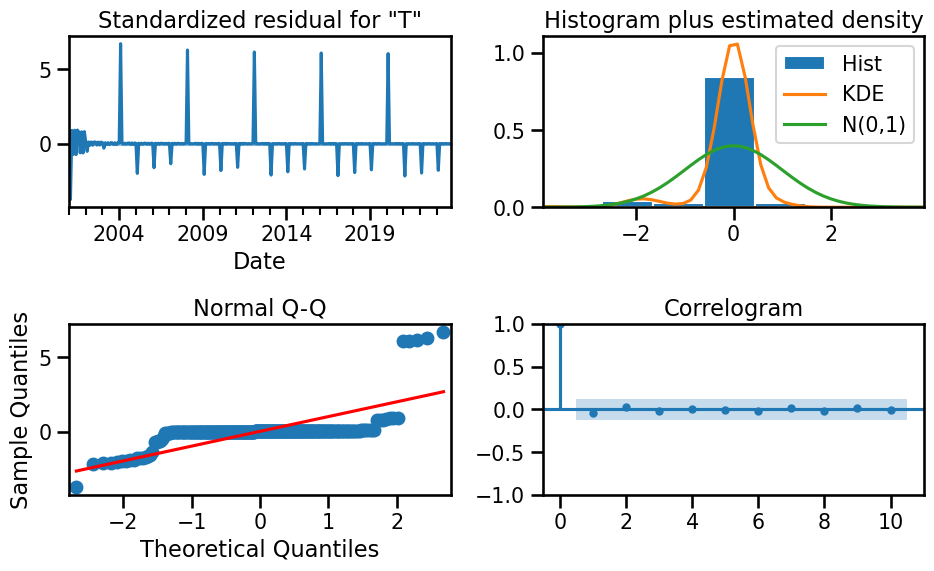

In [98]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Comparing Forecast vs. True Data'}, xlabel='Date'>)

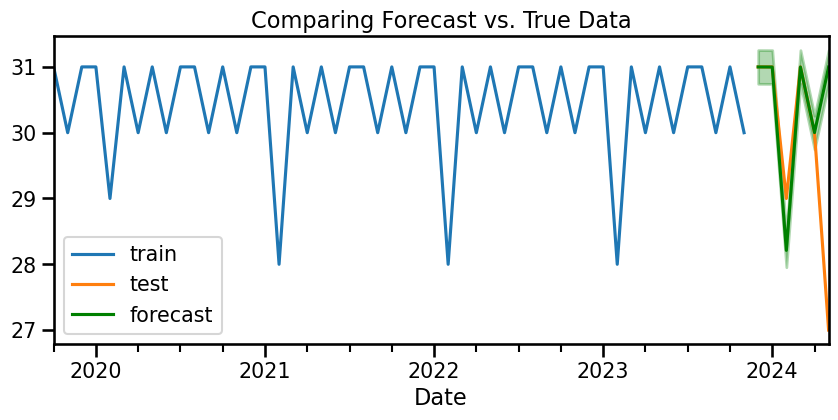

In [99]:
# Obtain summary of forecast as dataframe
forecast_df = sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df, n_train_lags = 50)


In [100]:
# evaluation
regression_metrics_ts(test, forecast_df["mean"])

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 0.799
- MSE = 2.768
- RMSE = 1.664
- R^2 = -0.294
- MAPE = 2.92%


In [101]:
# Define starting and final values
starting_value = forecast_df['mean'].iloc[0]
final_value = forecast_df['mean'].iloc[-1]
# Change in x
delta = final_value - starting_value
print(f'The change in X over the forecast is {delta: .2f}.')
perc_change = (delta/starting_value) *100
print (f'The percentage change is {perc_change :.2f}%.')


The change in X over the forecast is -0.00.
The percentage change is -0.00%.


### gridsearch

In [110]:
# Default auto_arima will select model based on AIC score
d_value = 0
D_value = 0 
auto_model = pm.auto_arima(

    train,
    d = d_value, D = D_value,
    seasonal=True,  # True or False
    m=12,  # if seasonal
    trace=True
)



Performing stepwise search to minimize aic


C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,2)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "C:\Users\haya_\hadilds\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEMode

 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=676.152, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=406.645, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2661.152, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=601.039, Time=0.09 sec


C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(0,0,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "C:\Users\haya_\hadilds\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEMode

 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=455.002, Time=0.13 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=406.712, Time=0.89 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=407.390, Time=0.22 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=406.393, Time=0.63 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=607.627, Time=0.07 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1706320605880.957, Time=0.25 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=406.868, Time=0.73 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=408.713, Time=0.67 sec
 ARIMA(1,0,0)(0,0,1)[12]             : AIC=744.832, Time=0.20 sec

Best model:  ARIMA(1,0,0

In [111]:
# Try auto_arima orders
sarima = tsa.ARIMA(train, order = auto_model.order, seasonal_order=auto_model.seasonal_order).fit()

# Obtain summary
sarima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              THEFT   No. Observations:                  275
Model:             ARIMA(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -199.196
Date:                            Thu, 04 Jul 2024   AIC                            406.391
Time:                                    17:53:37   BIC                            420.858
Sample:                                01-31-2001   HQIC                           412.197
                                     - 11-30-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4305      0.055    550.819      0.000      30.322      30.539
ar.L1         -0.4164      0.062     -6.689      0.000      -0.538      -0.294
ma.S.L12       0.6502      0.033     19.676      0.000       0.585       0.715
sigma2         0.2432      0.019     12.482      0.000       0.205       0.281
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               773.05
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -2.35
Prob(H) (two-sided):                  0.80   Kurtosis:                         9.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
final_p = 1  #(1,0,0)(0,0,1)[12]
final_q = 0
final_d = 0
final_P = 0
final_Q = 0
final_D = 1
final_model = tsa.ARIMA(
    ts,
    order=(final_p, final_d, final_q),
    seasonal_order=(final_P, final_D, final_Q, m),
).fit()


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 1.333
- MSE = 2.667
- RMSE = 1.633
- R^2 = -0.247
- MAPE = 4.63%


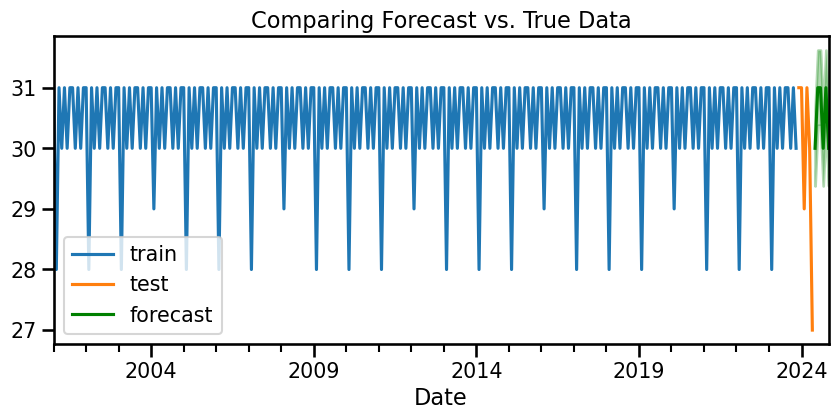

In [113]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = final_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [114]:
# Define starting and final values
starting_value = forecast_df['mean'].iloc[0]
final_value = forecast_df['mean'].iloc[-1]
# Change in x
delta = final_value - starting_value
print(f'The change in X over the forecast is {delta: .2f}.')
perc_change = (delta/starting_value) *100
print (f'The percentage change is {perc_change :.2f}%.')


The change in X over the forecast is  0.00.
The percentage change is 0.00%.


In [115]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 0  # nonseasonal differencing
q = 0 # nonseasonal MA

# Orders for seasonal components (if seasonal model)
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()
# Obtain summary
sarima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              THEFT   No. Observations:                  275
Model:             ARIMA(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -199.196
Date:                            Thu, 04 Jul 2024   AIC                            406.391
Time:                                    17:55:14   BIC                            420.858
Sample:                                01-31-2001   HQIC                           412.197
                                     - 11-30-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4305      0.055    550.819      0.000      30.322      30.539
ar.L1         -0.4164      0.062     -6.689      0.000      -0.538      -0.294
ma.S.L12       0.6502      0.033     19.676      0.000       0.585       0.715
sigma2         0.2432      0.019     12.482      0.000       0.205       0.281
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               773.05
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -2.35
Prob(H) (two-sided):                  0.80   Kurtosis:                         9.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

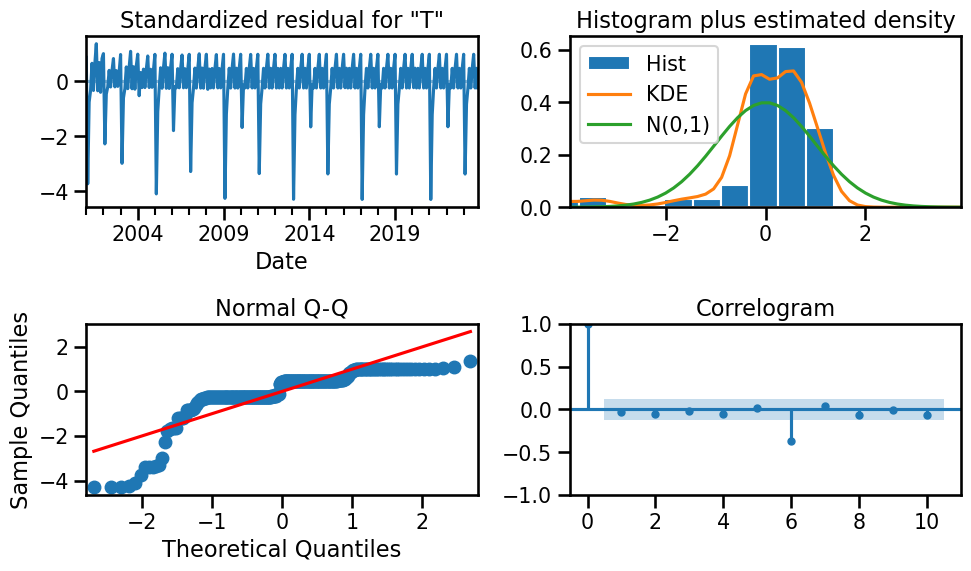

In [116]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

In [117]:
# evaluation
regression_metrics_ts(test, forecast_df["mean"])

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 1.333
- MSE = 2.667
- RMSE = 1.633
- R^2 = -0.247
- MAPE = 4.63%


## Battery

In [55]:
col = 'BATTERY' # if a dataframe
ts = crimes_ts[col]
ts

Date
2001-01-01    296
2001-01-02    143
2001-01-03    165
2001-01-04    173
2001-01-05    178
             ... 
2024-05-23    147
2024-05-24    137
2024-05-25    146
2024-05-26    168
2024-05-27      2
Freq: D, Name: BATTERY, Length: 8548, dtype: int64

In [56]:
# resampling
ts = ts.resample('M').count()
ts

Date
2001-01-31    31
2001-02-28    28
2001-03-31    31
2001-04-30    30
2001-05-31    31
              ..
2024-01-31    31
2024-02-29    29
2024-03-31    31
2024-04-30    30
2024-05-31    27
Freq: M, Name: BATTERY, Length: 281, dtype: int64

In [57]:
# check nulls 
ts.isna().sum()

0

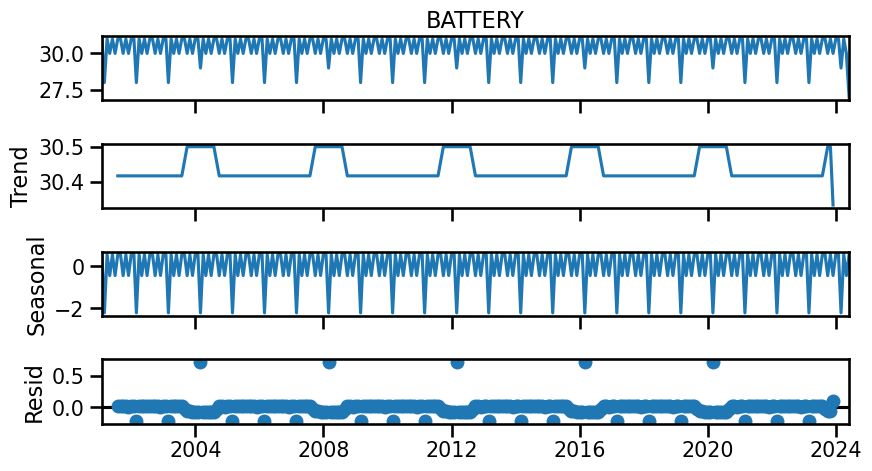

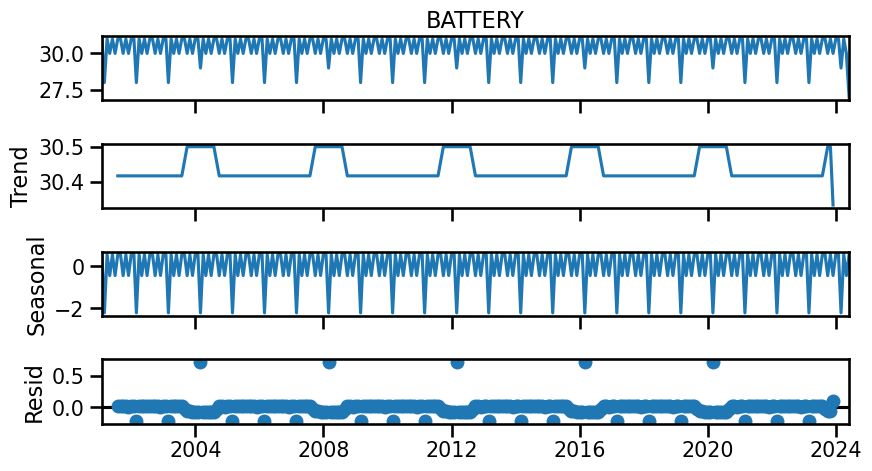

In [58]:
## Use Seasonal Decompose to check for seasonality
decomp = tsa.seasonal_decompose(ts)
fig = decomp.plot()
fig.set_size_inches(9, 5)
fig.tight_layout()## Use Seasonal Decompose to check for seasonality
decomp = tsa.seasonal_decompose(ts)
fig = decomp.plot()
fig.set_size_inches(9, 5)
fig.tight_layout()

- there is a seasonality behaviour 

In [59]:
# Determine differencing
d = ndiffs(ts)
print(f'd is {d}')
D = nsdiffs(ts, m = 12)
print(f'D is {D}')

d is 0
D is 0


In [60]:
# Check for stationarity
get_adfuller_results(ts)


,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-3.12772,14,266,0.024569,0.05,True


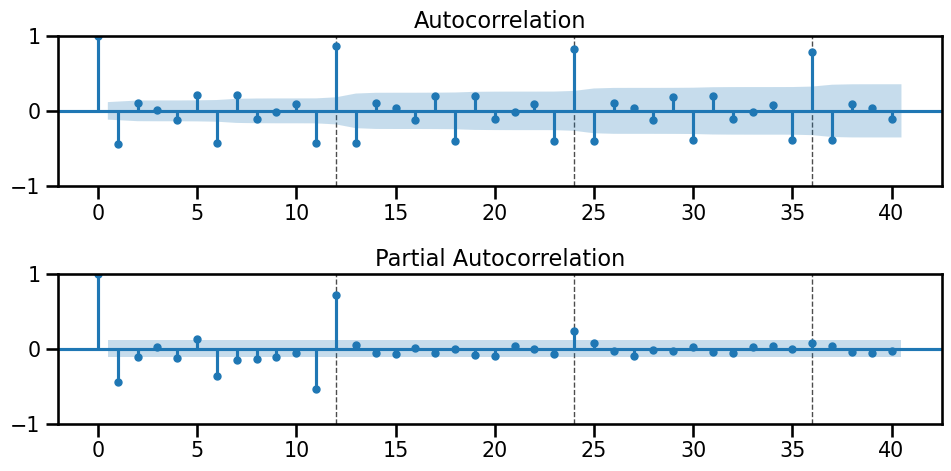

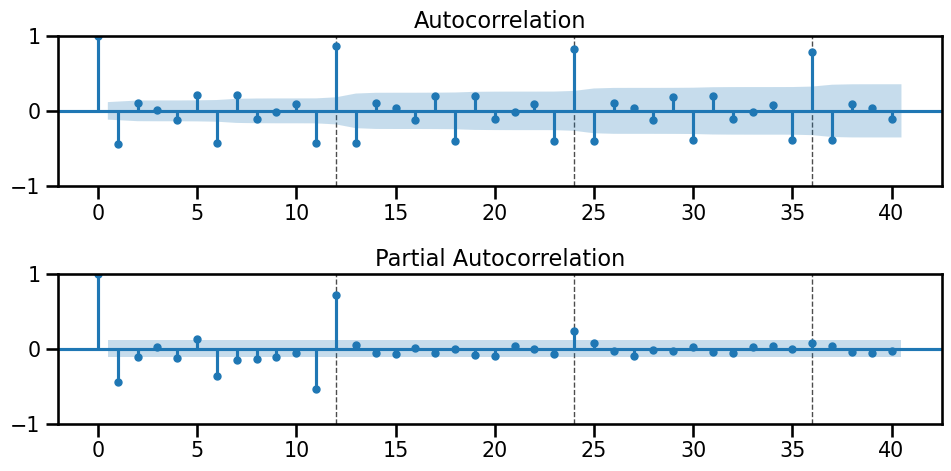

In [61]:
# ACF and PACF
plot_acf_pacf(ts, annotate_seas=True, m =12)


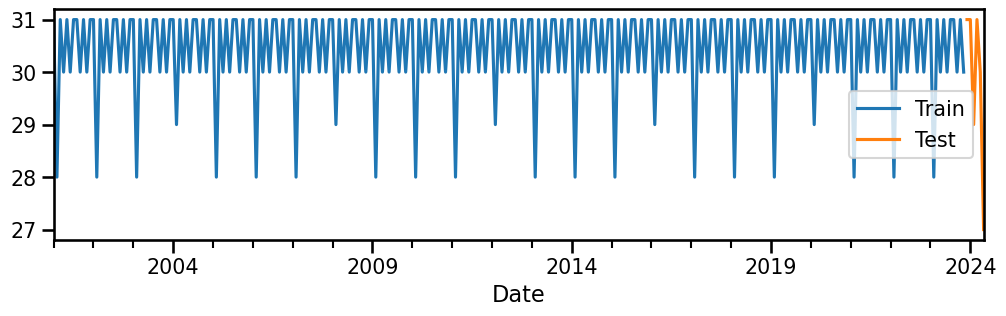

In [62]:
# split data to train and test 
train, test = train_test_split(ts, test_size=6)
# Visualize Train-test-split
ax = train.plot(label='Train')
test.plot(label='Test')
ax.legend();

In [63]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 0  # nonseasonal differencing
q = 1 # nonseasonal MA

# Orders for seasonal components (if seasonal model)
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()


In [64]:
# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           BATTERY   No. Observations:                  275
Model:             ARIMA(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                  43.485
Date:                           Thu, 04 Jul 2024   AIC                            -76.969
Time:                                   17:19:09   BIC                            -58.886
Sample:                               01-31-2001   HQIC                           -69.712
                                    - 11-30-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4205      0.387     78.675      0.000      29.663      31.178
ar.L1         -0.0442     15.091     -0.003      0.998     -29.622      29.534
ma.L1          0.0170     15.168      0.001      0.999     -29.713      29.747
ar.S.L12       0.9728      0.010     96.779      0.000       0.953       0.992
sigma2         0.0376      0.001     38.016      0.000       0.036       0.039
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5609.97
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.84
Prob(H) (two-sided):                  0.69   Kurtosis:                        25.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

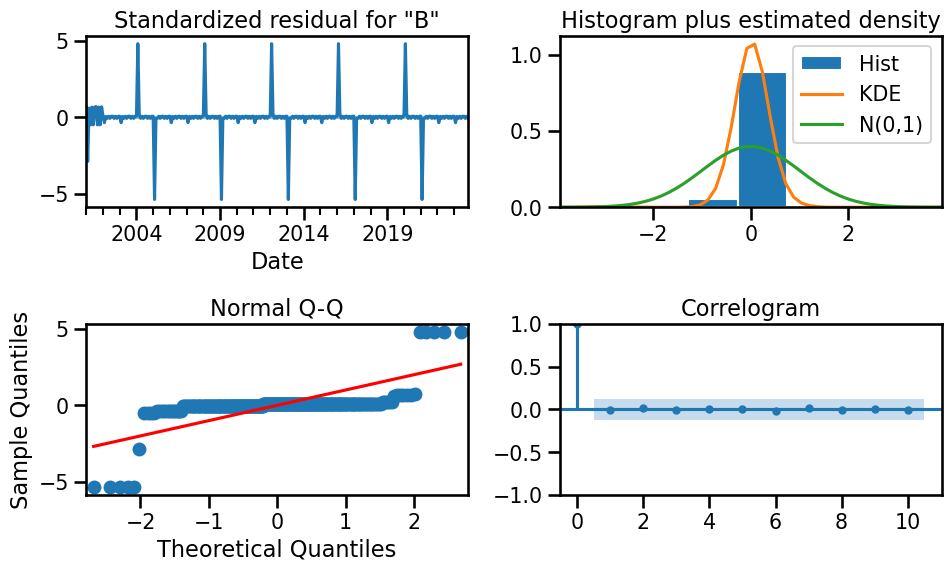

In [65]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Comparing Forecast vs. True Data'}, xlabel='Date'>)

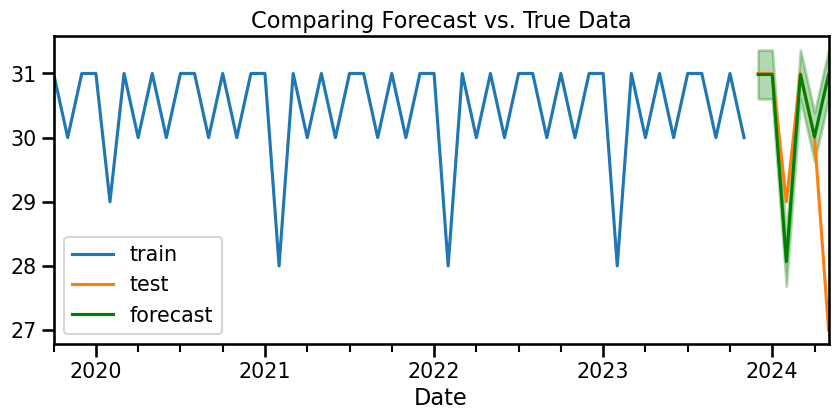

In [66]:
# Obtain summary of forecast as dataframe
forecast_df = sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df, n_train_lags = 50)

In [67]:
# evaluation
regression_metrics_ts(test, forecast_df["mean"])


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 0.829
- MSE = 2.791
- RMSE = 1.671
- R^2 = -0.305
- MAPE = 3.03%


In [78]:
# Define starting and final values
starting_value = forecast_df['mean'].iloc[0]
print(starting_value)
final_value = forecast_df['mean'].iloc[-1]
print(final_value)
# Change in x
delta = final_value - starting_value
print(f'The change in X over the forecast is {delta: .2f}.')
perc_change = (delta/starting_value) *100
print (f'The percentage change is {perc_change :.2f}%.')


30.00425658747931
30.004256587479272
The change in X over the forecast is -0.00.
The percentage change is -0.00%.


### gridsearch

In [79]:
# Default auto_arima will select model based on AIC score
d_value = 0
D_value = 0
auto_model = pm.auto_arima(
    train,
    d = d_value, D = D_value,
    seasonal=True,  # True or False
    m=12,  # if seasonal
    trace=True
)

Performing stepwise search to minimize aic


C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,2)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "C:\Users\haya_\hadilds\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEMode

 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=676.152, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=406.645, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2661.152, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=601.039, Time=0.08 sec


C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(0,0,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "C:\Users\haya_\hadilds\Lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "C:\Users\haya_\hadilds\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEMode

 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.87 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=455.002, Time=0.13 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=406.712, Time=0.93 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=407.390, Time=0.24 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=406.393, Time=0.60 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=607.627, Time=0.07 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1706320605880.957, Time=0.25 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=406.868, Time=0.74 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=408.713, Time=0.70 sec
 ARIMA(1,0,0)(0,0,1)[12]             : AIC=744.832, Time=0.20 sec

Best model:  ARIMA(1,0,0

In [80]:
# Try auto_arima orders
sarima = tsa.ARIMA(train, order = auto_model.order, seasonal_order=auto_model.seasonal_order).fit()

In [81]:
# Obtain summary
sarima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            BATTERY   No. Observations:                  275
Model:             ARIMA(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -199.196
Date:                            Thu, 04 Jul 2024   AIC                            406.391
Time:                                    17:30:49   BIC                            420.858
Sample:                                01-31-2001   HQIC                           412.197
                                     - 11-30-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4305      0.055    550.819      0.000      30.322      30.539
ar.L1         -0.4164      0.062     -6.689      0.000      -0.538      -0.294
ma.S.L12       0.6502      0.033     19.676      0.000       0.585       0.715
sigma2         0.2432      0.019     12.482      0.000       0.205       0.281
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               773.05
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -2.35
Prob(H) (two-sided):                  0.80   Kurtosis:                         9.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
final_p = 0
final_q = 0
final_d = 0
final_P = 2
final_Q = 1
final_D = 0
final_model = tsa.ARIMA(
    ts,
    order=(final_p, final_d, final_q),
    seasonal_order=(final_P, final_D, final_Q, m),
).fit()

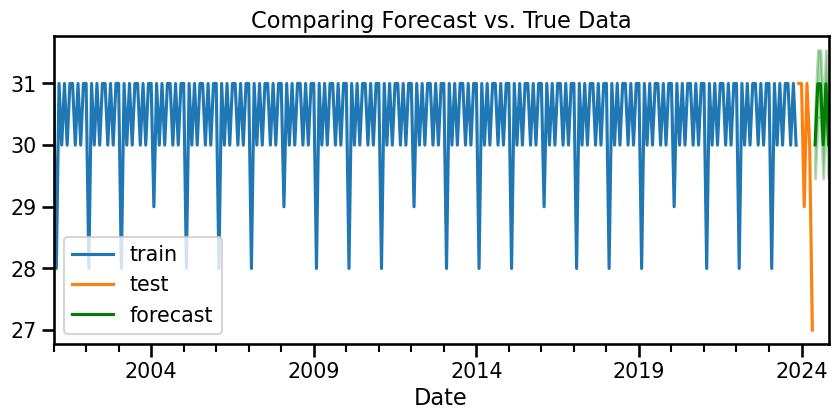

In [83]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = final_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);

In [84]:
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 1.332
- MSE = 2.662
- RMSE = 1.632
- R^2 = -0.245
- MAPE = 4.63%


In [85]:
# Define starting and final values
starting_value = forecast_df['mean'].iloc[0]
final_value = forecast_df['mean'].iloc[-1]
# Change in x
delta = final_value - starting_value
print(f'The change in X over the forecast is {delta: .2f}.')
perc_change = (delta/starting_value) *100
print (f'The percentage change is {perc_change :.2f}%.')


The change in X over the forecast is -0.00.
The percentage change is -0.00%.


In [86]:
starting_value = forecast_df['mean'].iloc[0]
starting_value

30.00425658747931

In [87]:
final_value = forecast_df['mean'].iloc[-1]
final_value

30.004256587479272